In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

In [2]:
# Seed for reproducibility
np.random.seed(42)

In [3]:
# Create DataFrame
n_samples = 500
data = {
    'Sales': np.random.lognormal(mean=10, sigma=1.5, size=n_samples).astype(int),
    'Buyers': np.random.randint(100, 2000, size=n_samples),
    'Transactions': np.random.randint(500, 50000, size=n_samples)
}
df = pd.DataFrame(data)

In [4]:
df.head()

,Sales,Buyers,Transactions
0,46400,1405,18185
1,17900,1443,41901
2,58193,1861,11872
3,216326,1566,9496
4,15502,414,16958


In [5]:
# Apply log transformation to 'Sales'
df['Sales'] = np.log1p(df['Sales'])

### Data Visualisation


c:\Users\radhe\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


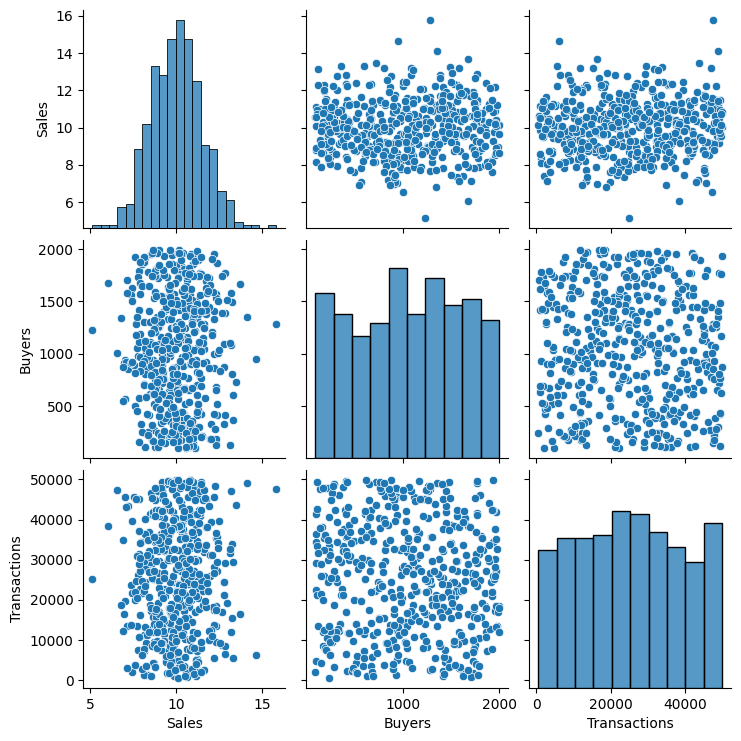

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
import matplotlib.pyplot as plt
df.corr()

,Sales,Buyers,Transactions
Sales,1.000000,0.017461,0.040217
Buyers,0.017461,1.000000,-0.064430
Transactions,0.040217,-0.064430,1.000000


### Feature Engeerning

In [8]:
# Independent and Dependent features
X = df[['Buyers', 'Transactions']]
y = df['Sales']

In [9]:
# Feature Engineering: Adding polynomial features
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

In [10]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [12]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=45)

In [14]:
# Set up the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [114]:
# Predict on the test set
y_pred = model.predict(X_test)

In [115]:
# Print metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.1923244346404727
MSE: 2.207865705755622
RMSE: 1.4858888604992038


In [116]:
# Save the model
import joblib
joblib.dump(model, 'linear_regression_model.pkl')

# Save feature transformers
joblib.dump(poly, 'polynomial_features.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']